# Supervised Machine Learning: Unsupervised Learning - Project

## Course 4 (IBM Machine Learning Professional Certificate) 

This notebook is based on the structure/ideas which are part of the Lab Demos of the Unsupervised Learning course by IBM ((c) 2020 IBM Corporation) as well as on the concepts taught in the class. Moreover, this course is part of the IBM Machine Learning Professional Certificate, which can be found here: https://www.coursera.org/professional-certificates/ibm-machine-learning

By: Berni Stitic, February 2022

## Index  

1. Loading the data set
2. Initial exploration
3. Preprocessing
4. K-Means models
5. Agglomerative clustering model 
6. DBSCAN model

## 1. Loading the data set 

The chosen data set for this project is the wine quality data set which was used in the class and preprocessed in the file "04c_LAB_Clustering_Methods.ipynb" ((c) 2020 IBM Corporation). The data set, as described in the laboratory, contains different chemical properties of wine, for instance: acidity, sugar, pH, alcohol. There is also a quality metric (3-9, where 9 is the highest) and color (red or white). 

Like in the lab, in this project all features will be used except for the quality metric and the color. This will be explained later. 

In [1]:
# This cell was taken from the lab demo
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

In [2]:
# read the data
data = pd.read_csv('Wine_Quality_Data.csv')

## 2. Initial exploration

#### Initial inspection 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# See some samples rows, can use .T for better visualization
data.head().T

0       1      2      3       4
fixed_acidity            7.4     7.8    7.8   11.2     7.4
volatile_acidity         0.7    0.88   0.76   0.28     0.7
citric_acid              0.0     0.0   0.04   0.56     0.0
residual_sugar           1.9     2.6    2.3    1.9     1.9
chlorides              0.076   0.098  0.092  0.075   0.076
free_sulfur_dioxide     11.0    25.0   15.0   17.0    11.0
total_sulfur_dioxide    34.0    67.0   54.0   60.0    34.0
density               0.9978  0.9968  0.997  0.998  0.9978
pH                      3.51     3.2   3.26   3.16    3.51
sulphates               0.56    0.68   0.65   0.58    0.56
alcohol                  9.4     9.8    9.8    9.8     9.4
quality                    5       5      5      6       5
color                    red     red    red    red     red

In [5]:
# Get information such as shape, dtypes
print(data.dtypes)
print(" ")
print(data.shape)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object
 
(6497, 13)


#### Preliminary description of features 

In [6]:
# Get some preliminary description of the data
data.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [7]:
# For object type columns
data.describe(include='object').T

count unique    top  freq
color  6497      2  white  4898

#### Histogram of potential clusters (color) 

In [8]:
#Get values per color (this cell was taken from the lab demo)
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

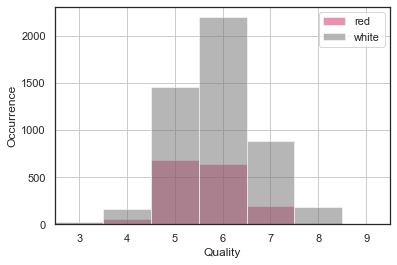

In [6]:
# This cell was taken from the lab demo as well 
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')

#### Preliminary pair plot

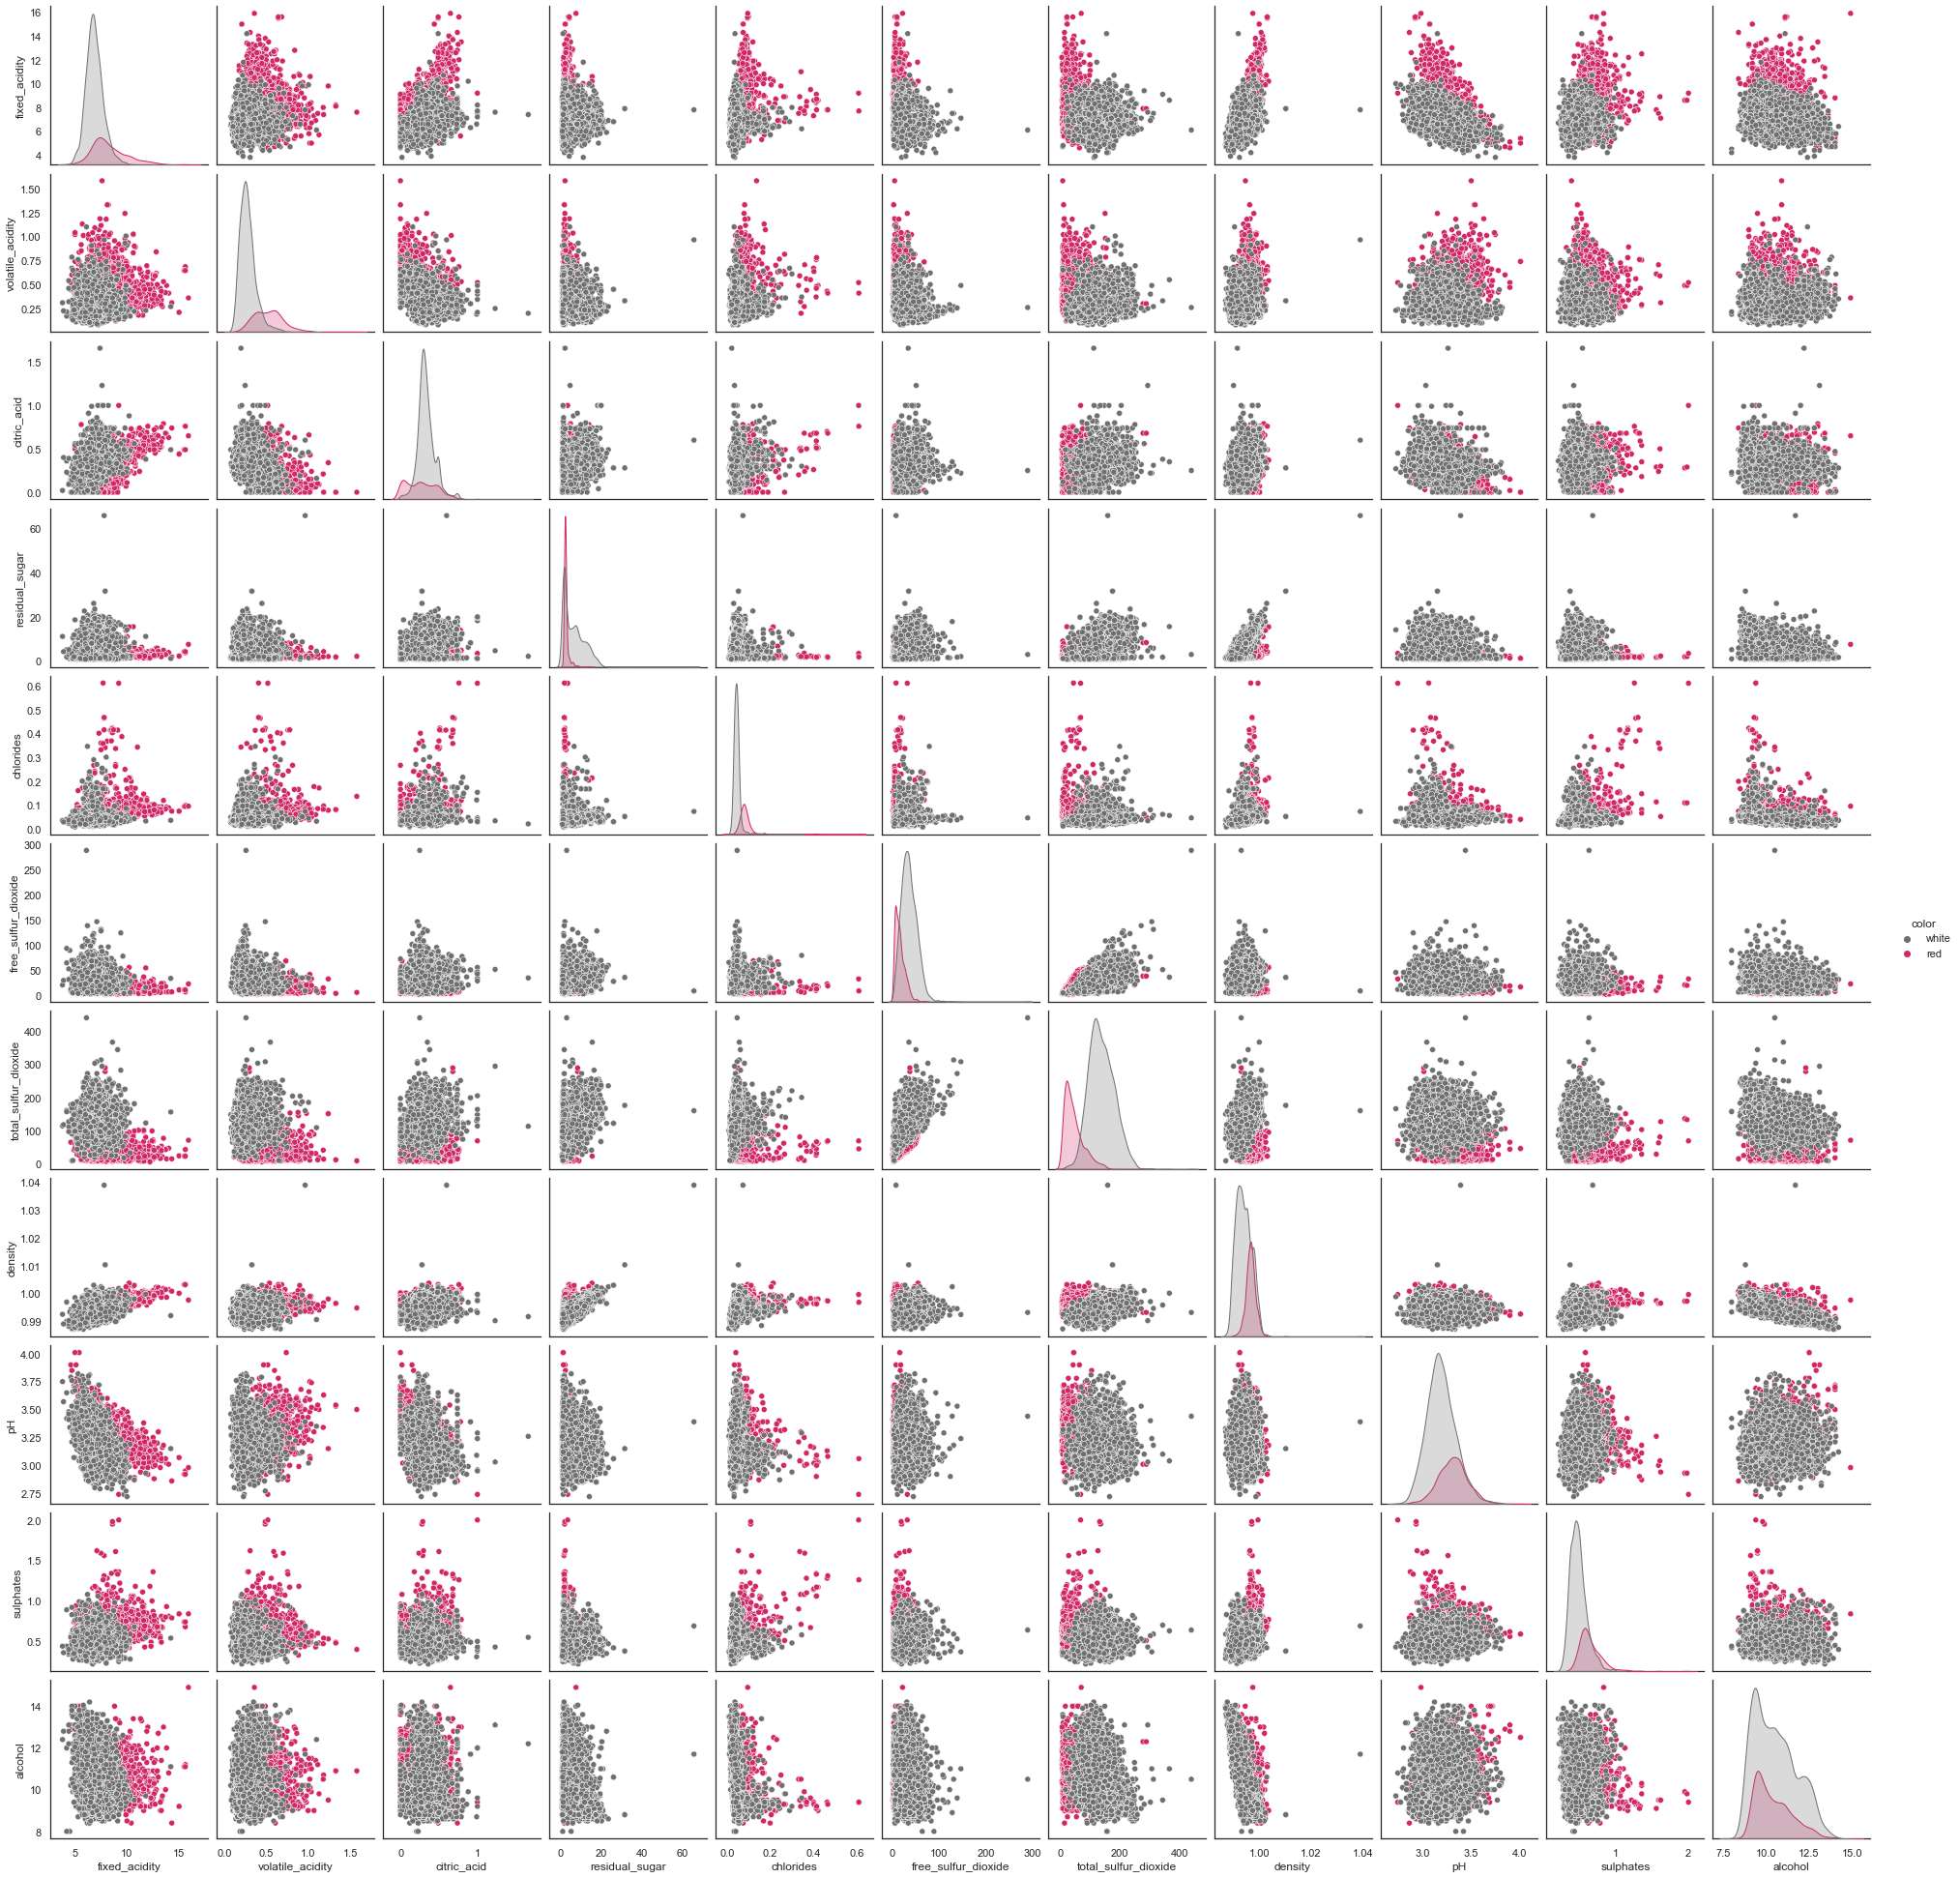

In [12]:
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':white}
)

#### Correlation 

In [10]:
# Let's follow the steps from the lab demo and examine the correlation between feature pairs first
# We'll be using only float type columns
# This code cell was adapted from the lab demo
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# Correlation matrix
corr_mat_wine = data[float_columns].corr()

# Change values of the diagonals (required for later step)
for x in range(len(float_columns)):
    corr_mat_wine.iloc[x,x] = 0.0
    
corr_mat_wine

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              0.000000          0.219008     0.324436   
volatile_acidity           0.219008          0.000000    -0.377981   
citric_acid                0.324436         -0.377981     0.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              0.000000  -0.128940             0.402871   
chlorides                  -0.128940   0.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             0.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              0.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  0.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  0.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   0.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   

                       alcohol  
fixed_acidity        -0.095452  
volatile_acidity     -0.037640  
citric_acid          -0.010493  
residual_sugar       -0.359415  
chlorides            -0.256916  
free_sulfur_dioxide  -0.179838  
total_sulfur_dioxide -0.265740  
density              -0.686745  
pH                    0.121248  
sulphates            -0.003029  
alcohol               0.000000

In [11]:
# Like in the lab, let's examine the pairwise correlations next with idxmax()
corr_mat_wine.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

##  3. Preprocessing

#### Skewness 

In [14]:
# Let's examine skewness next (this code cell was adapted from the lab demo)
# Let's also use the criteria of skewness > 0.75
skew_columns_wine = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns_wine = skew_columns_wine.loc[skew_columns_wine > 0.75]
skew_columns_wine

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [15]:
skew_columns_wine.index

Index(['chlorides', 'sulphates', 'fixed_acidity', 'volatile_acidity',
       'residual_sugar', 'free_sulfur_dioxide'],
      dtype='object')

In [13]:
# just to check the initial situation
skew_columns_wine_initial = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
skew_columns_wine_initial

chlorides               5.399828
sulphates               1.797270
fixed_acidity           1.723290
volatile_acidity        1.495097
residual_sugar          1.435404
free_sulfur_dioxide     1.220066
alcohol                 0.565718
density                 0.503602
citric_acid             0.471731
pH                      0.386839
total_sulfur_dioxide   -0.001177
dtype: float64

#### Log transformation of skewed features 

In [13]:
# This code cell was adapted from the lab demo too
for col in skew_columns_wine.index.tolist():
    data[col] = np.log1p(data[col])

#### Feature scaling 

In [14]:
# Let's start using StandardScaler, like in the lab (other scalers might be suggested later depending on results)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[float_columns] = scaler.fit_transform(data[float_columns])

data.head().T #like before

0         1         2         3         4
fixed_acidity         0.229509  0.550261  0.550261  2.802728  0.229509
volatile_acidity      2.135767  3.012817  2.438032 -0.337109  2.135767
citric_acid          -2.192833 -2.192833 -1.917553  1.661085 -2.192833
residual_sugar       -0.815173 -0.498175  -0.62574 -0.815173 -0.815173
chlorides             0.624554  1.281999  1.104012  0.594352  0.624554
free_sulfur_dioxide  -1.193601 -0.013944 -0.754684 -0.574982 -1.193601
total_sulfur_dioxide -1.446359 -0.862469 -1.092486 -0.986324 -1.446359
density               1.034993  0.701486  0.768188  1.101694  1.034993
pH                     1.81309 -0.115073   0.25812 -0.363868   1.81309
sulphates             0.250355  1.059213  0.862549  0.389396  0.250355
alcohol              -0.915464 -0.580068 -0.580068 -0.580068 -0.915464
quality                      5         5         5         6         5
color                      red       red       red       red       red

In [15]:
# Get information such as shape, dtypes again (sanity check)
print(data.dtypes)
print(" ")
print(data.shape)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object
 
(6497, 13)


In [16]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

#### Gathering useful statistics 

In [17]:
data.describe().T

count          mean       std       min       25%  \
fixed_acidity         6497.0  5.276917e-15  1.000077 -3.629006 -0.644436   
volatile_acidity      6497.0 -7.298900e-16  1.000077 -1.817681 -0.684343   
citric_acid           6497.0 -1.753083e-16  1.000077 -2.192833 -0.472334   
residual_sugar        6497.0 -1.453628e-15  1.000077 -1.687053 -0.866619   
chlorides             6497.0 -7.225250e-16  1.000077 -1.463780 -0.543350   
free_sulfur_dioxide   6497.0  3.034910e-15  1.000077 -3.927293 -0.574982   
total_sulfur_dioxide  6497.0 -9.658103e-16  1.000077 -1.941780 -0.685532   
density               6497.0 -4.487338e-15  1.000077 -2.530192 -0.785953   
pH                    6497.0  3.086803e-15  1.000077 -3.100615 -0.674862   
sulphates             6497.0 -4.748549e-15  1.000077 -2.432834 -0.699339   
alcohol               6497.0  1.542248e-15  1.000077 -2.089350 -0.831615   
quality               6497.0  5.818378e+00  0.873255  3.000000  5.000000   

                           50%       75%        max  
fixed_acidity        -0.106896  0.471461   5.049633  
volatile_acidity     -0.269292  0.443810   5.771086  
citric_acid          -0.059414  0.491146   9.231281  
residual_sugar       -0.343710  0.861368   3.783867  
chlorides            -0.262922  0.290773  13.734706  
free_sulfur_dioxide   0.204386  0.717742   3.665722  
total_sulfur_dioxide  0.039907  0.712265   5.737257  
density               0.064489  0.764853  14.768791  
pH                   -0.052874  0.631312   4.923029  
sulphates            -0.105201  0.526688   7.387697  
alcohol              -0.160823  0.677667   3.696231  
quality               6.000000  6.000000   9.000000

#### New pair plot 

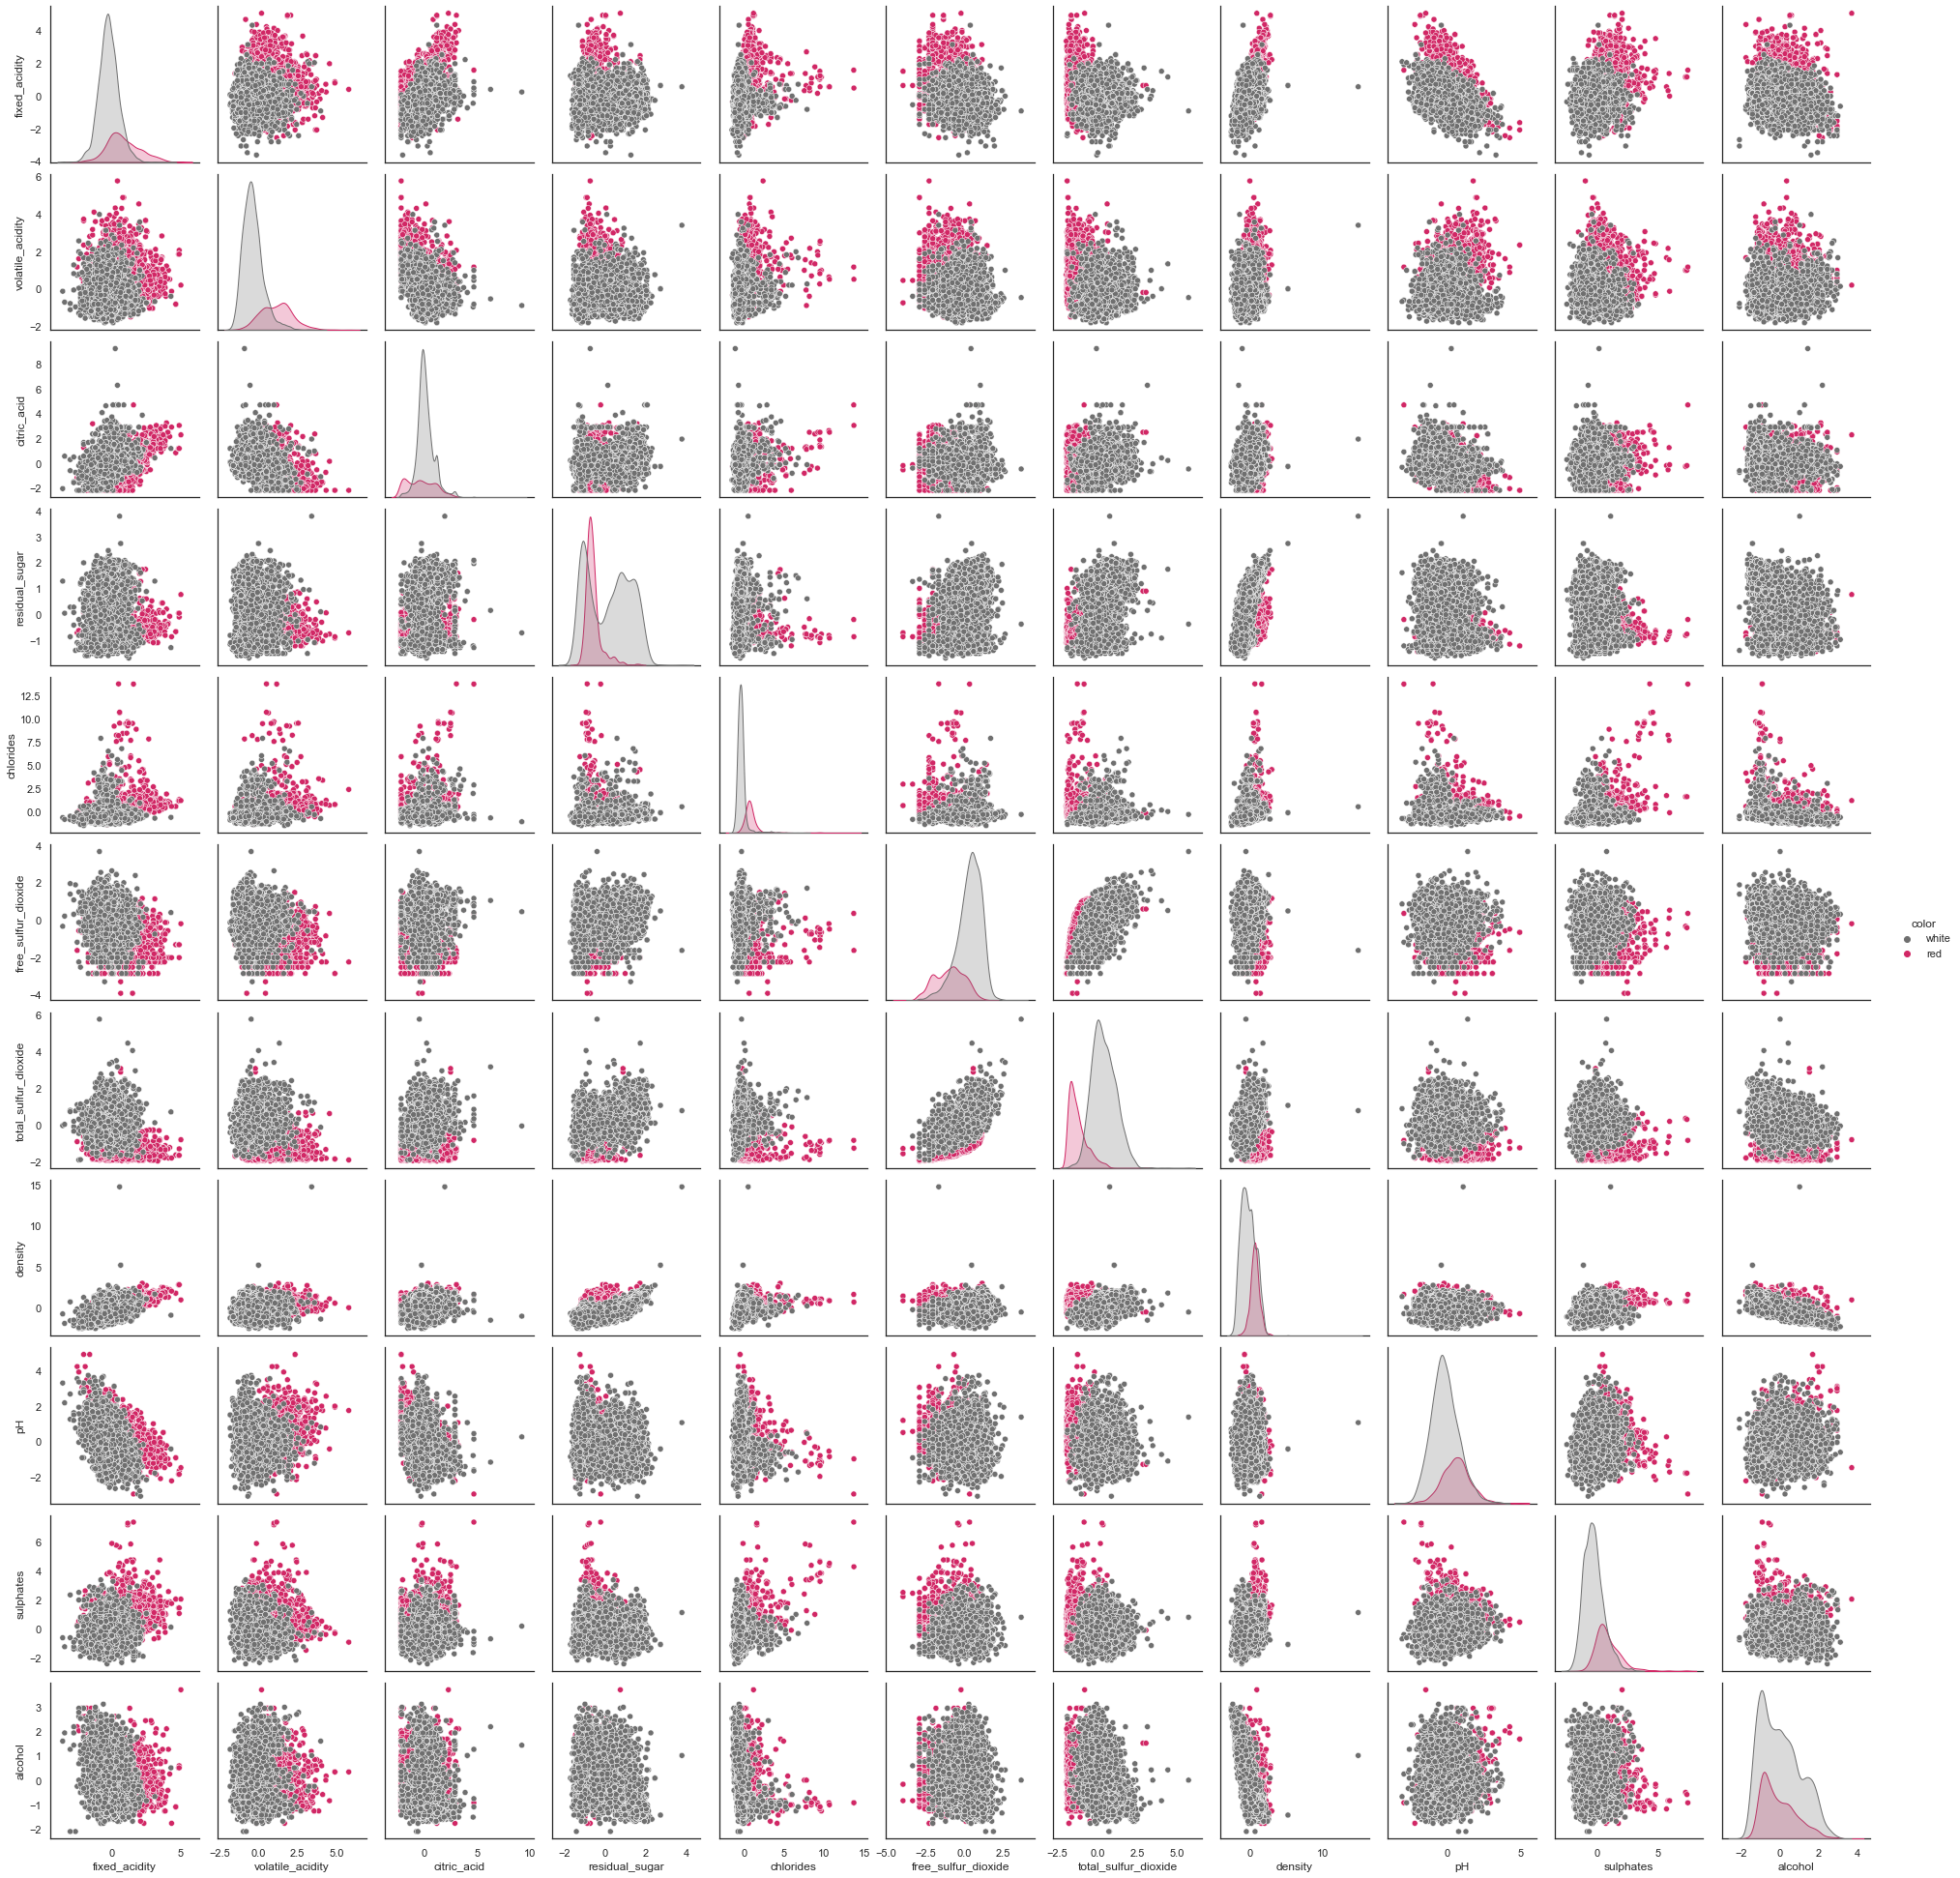

In [18]:
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':white}
)

#### Check for skewness 

In [19]:
skew_columns_wine = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns_wine

chlorides               4.484421
volatile_acidity        1.126873
sulphates               1.098588
fixed_acidity           0.976702
alcohol                 0.565718
density                 0.503602
citric_acid             0.471731
residual_sugar          0.414917
pH                      0.386839
total_sulfur_dioxide   -0.001177
free_sulfur_dioxide    -0.721434
dtype: float64

#### Save the preprocessed data 

In [20]:
outputfile = 'wine_quality_processed_project.csv'
data.to_csv(outputfile, index=False)

#### Load back the data set 

In [2]:
data = pd.read_csv('wine_quality_processed_project.csv')

#### Check for useful statistics 

In [3]:
data.describe().T

count          mean       std       min       25%  \
fixed_acidity         6497.0  5.279070e-15  1.000077 -3.629006 -0.644436   
volatile_acidity      6497.0 -7.323337e-16  1.000077 -1.817681 -0.684343   
citric_acid           6497.0 -1.745137e-16  1.000077 -2.192833 -0.472334   
residual_sugar        6497.0 -1.459097e-15  1.000077 -1.687053 -0.866619   
chlorides             6497.0 -7.247123e-16  1.000077 -1.463780 -0.543350   
free_sulfur_dioxide   6497.0  3.034103e-15  1.000077 -3.927293 -0.574982   
total_sulfur_dioxide  6497.0 -9.983378e-16  1.000077 -1.941780 -0.685532   
density               6497.0 -4.488978e-15  1.000077 -2.530192 -0.785953   
pH                    6497.0  3.102216e-15  1.000077 -3.100615 -0.674862   
sulphates             6497.0 -4.748275e-15  1.000077 -2.432834 -0.699339   
alcohol               6497.0  1.541496e-15  1.000077 -2.089350 -0.831615   
quality               6497.0  5.818378e+00  0.873255  3.000000  5.000000   

                           50%       75%        max  
fixed_acidity        -0.106896  0.471461   5.049633  
volatile_acidity     -0.269292  0.443810   5.771086  
citric_acid          -0.059414  0.491146   9.231281  
residual_sugar       -0.343710  0.861368   3.783867  
chlorides            -0.262922  0.290773  13.734706  
free_sulfur_dioxide   0.204386  0.717742   3.665722  
total_sulfur_dioxide  0.039907  0.712265   5.737257  
density               0.064489  0.764853  14.768791  
pH                   -0.052874  0.631312   4.923029  
sulphates            -0.105201  0.526688   7.387697  
alcohol              -0.160823  0.677667   3.696231  
quality               6.000000  6.000000   9.000000

#### Check for data types 

In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

##  4. K-Means model

#### Float columns  

In [11]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

#### K-means model (two clusters)

In [19]:
# This cell was adapted from the lab demo on clustering
# Objective is to obtain two clusters (aim is to separate based on color using float numbers)
# It is also possible, for instance, to study inertia values and perhaps select another number of clusters (could potentially
# lead to other groups based on combined features)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)
km = km.fit(data[float_columns])
data['kmeans'] = km.predict(data[float_columns])

In [13]:
# This code cell was adapted from the laboratory demo 
data[['color','kmeans']].groupby(['kmeans','color']).size().to_frame().rename(columns={0:'total'})

total
kmeans color       
0      red       23
       white   4811
1      red     1576
       white     87

#### Inertia per cluster 

In [16]:
# This code cell was adapted from the lab demo (clustering)
# The objective is to see whether there's a clear elbow when considering intertia vs. clustering
km_model_list = list()

for cluster_number in range(1,21):
    km_model = KMeans(n_clusters=cluster_number, random_state=0)
    km_model = km_model.fit(data[float_columns])
    
    km_model_list.append(pd.Series({'clusters': cluster_number, 
                              'inertia': km_model.inertia_,
                              'model': km_model}))

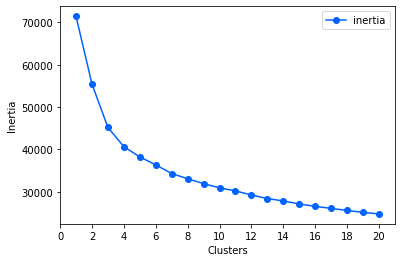

In [18]:
# This code cell was adapted from the lab demo
plot_data = (pd.concat(km_model_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Clusters', ylabel='Inertia');

There's no clear/sharp elbow, unfortunately. However, perhaps 3-4 clusters might be good candidates based on the plot. Let's try training a K-means model with 4 clusters.

#### Kmeans model (four clusters) 

In [14]:
km_4 = KMeans(n_clusters=4, random_state=0)
km_4 = km_4.fit(data[float_columns])
data['kmeans_4'] = km_4.predict(data[float_columns])

In [20]:
data[['color', 'kmeans_4']].groupby(['kmeans_4','color']).size().to_frame().rename(columns={0:'total'})

total
kmeans_4 color       
0        red       32
         white   2659
1        red       14
         white   2101
2        red      648
         white     53
3        red      905
         white     85

In the example above, it would be necessary to study the numeric, continuous features (likely ranges of the values) and work with subject matter experts to interpret the resulting four clusters more appropriately. However, it is possible to see that the way colors were distributed this time is a bit more balanced in comparison to the results obtained when clustering using n_clusters=2.

#### Save the data 

In [22]:
outputfile = 'Kmeans_predictions.csv'
data.to_csv(outputfile, index=False)

#### Save the models 

In [24]:
# Let's save the K-means models using pickle
import pickle
name = "../models/kmeans_2.sav"
pickle.dump(km, open(name, 'wb'))

In [25]:
name = "../models/kmeans_4.sav"
pickle.dump(km_4, open(name, 'wb'))

#### Load the models back 

In [26]:
km = pickle.load(open("../models/kmeans_2.sav", 'rb'))
km_4 = pickle.load(open("../models/kmeans_4.sav", 'rb'))

#### Sanity checks (two clusters) 

In [30]:
# Reference for comparing: https://www.kite.com/python/answers/how-to-compare-two-pandas-dataframe-columns-in-python
data['kmeans_2'] = km.predict(data[float_columns])
comp = np.where(data['kmeans'] == data['kmeans_2'], True, False) #returns numpy array

for i in range(len(comp)):
    if (comp[i] == False):
        print(comp[i])

#### Sanity checks (four clusters)  

In [32]:
data['kmeans_4_2'] = km_4.predict(data[float_columns])
comp = np.where(data['kmeans_4'] == data['kmeans_4_2'], True, False) #returns numpy array

for i in range(len(comp)):
    if (comp[i] == False):
        print(comp[i])

##  5. Agglomerative clustering model 

Due to the proportion of white and red wine samples, let's try a different approach for clustering next (using two clusters like the baseline K-Means model).

#### Load back the data (K-Means)

In [5]:
data = pd.read_csv('Kmeans_predictions.csv')

#### Float columns  

In [ ]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

#### Check for useful statistics and data types 

In [6]:
data.describe().T

count          mean       std       min       25%  \
fixed_acidity         6497.0  5.279070e-15  1.000077 -3.629006 -0.644436   
volatile_acidity      6497.0 -7.323337e-16  1.000077 -1.817681 -0.684343   
citric_acid           6497.0 -1.742403e-16  1.000077 -2.192833 -0.472334   
residual_sugar        6497.0 -1.459097e-15  1.000077 -1.687053 -0.866619   
chlorides             6497.0 -7.247123e-16  1.000077 -1.463780 -0.543350   
free_sulfur_dioxide   6497.0  3.034103e-15  1.000077 -3.927293 -0.574982   
total_sulfur_dioxide  6497.0 -9.983378e-16  1.000077 -1.941780 -0.685532   
density               6497.0 -4.488978e-15  1.000077 -2.530192 -0.785953   
pH                    6497.0  3.102216e-15  1.000077 -3.100615 -0.674862   
sulphates             6497.0 -4.748275e-15  1.000077 -2.432834 -0.699339   
alcohol               6497.0  1.541564e-15  1.000077 -2.089350 -0.831615   
quality               6497.0  5.818378e+00  0.873255  3.000000  5.000000   
kmeans                6497.0  2.559643e-01  0.436435  0.000000  0.000000   
kmeans_4              6497.0  9.984608e-01  1.063847  0.000000  0.000000   

                           50%       75%        max  
fixed_acidity        -0.106896  0.471461   5.049633  
volatile_acidity     -0.269292  0.443810   5.771086  
citric_acid          -0.059414  0.491146   9.231281  
residual_sugar       -0.343710  0.861368   3.783867  
chlorides            -0.262922  0.290773  13.734706  
free_sulfur_dioxide   0.204386  0.717742   3.665722  
total_sulfur_dioxide  0.039907  0.712265   5.737257  
density               0.064489  0.764853  14.768791  
pH                   -0.052874  0.631312   4.923029  
sulphates            -0.105201  0.526688   7.387697  
alcohol              -0.160823  0.677667   3.696231  
quality               6.000000  6.000000   9.000000  
kmeans                0.000000  1.000000   1.000000  
kmeans_4              1.000000  2.000000   3.000000

In [9]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
kmeans                    int64
kmeans_4                  int64
dtype: object

#### Agglomerative clustering model (two clusters) 

In [10]:
# This code cell was adapted from the clustering demo. Also, the ward linkage has been selected for this project. 
from sklearn.cluster import AgglomerativeClustering
ag_model = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag_model = ag_model.fit(data[float_columns])
data['agglom'] = ag_model.fit_predict(data[float_columns])

#### Results 

In [12]:
# This code cell was adapted from the lab demo (similarly to the case of K-Means)
(data[['color','agglom']].groupby(['color','agglom'])
 .size().to_frame().rename(columns={0:'total'}))

total
color agglom       
red   0          31
      1        1568
white 0        4755
      1         143

#### Comparison 

In [11]:
# This code cell was adapted from the lab demo (similarly to the case of K-Means)
(data[['color','agglom','kmeans']].groupby(['color','agglom','kmeans'])
 .size().to_frame().rename(columns={0:'total'}))

total
color agglom kmeans       
red   0      0          18
             1          13
      1      0           5
             1        1563
white 0      0        4717
             1          38
      1      0          94
             1          49

Similarly to the lab demo, results for each wine type seem pretty consistent.

#### Save the data 

In [13]:
outputfile = 'Agg_kmeans_predictions.csv'
data.to_csv(outputfile, index=False)

#### Dendrogram 

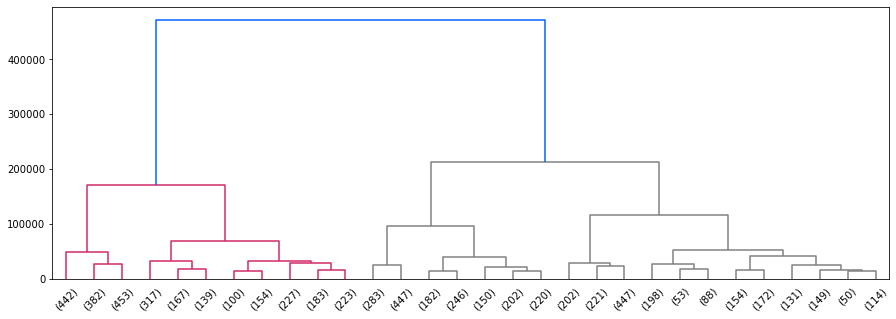

In [14]:
# This code cell was adapted from the lab demo
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag_model.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = colors[2]
blue = colors[0]

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

## 6. DBSCAN model 

Based on the obtained pair plots, another clustering approach to consider could be DBSCAN, which also detects outliers. Optimizing for the hyperparameters of DBSCAN is difficult so in this project the values to consider will be the ones that were suggested in the course (eps=3, min_samples=2). Furthermore, in this project, the usage of DBSCAN is for exploratory purposes, in particular to see whether further insight can be gathered about the data with respect to clustering. 

Reference for DBSCAN (Scikit-learn): https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html   

#### Float columns  

In [12]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

#### Load back the data (K-Means and AC) 

In [13]:
data = pd.read_csv('Agg_kmeans_predictions.csv')

#### Check for useful statistics and data types  

In [14]:
data.describe().T

count          mean       std       min       25%  \
fixed_acidity         6497.0  5.279070e-15  1.000077 -3.629006 -0.644436   
volatile_acidity      6497.0 -7.323337e-16  1.000077 -1.817681 -0.684343   
citric_acid           6497.0 -1.742403e-16  1.000077 -2.192833 -0.472334   
residual_sugar        6497.0 -1.459097e-15  1.000077 -1.687053 -0.866619   
chlorides             6497.0 -7.247123e-16  1.000077 -1.463780 -0.543350   
free_sulfur_dioxide   6497.0  3.034103e-15  1.000077 -3.927293 -0.574982   
total_sulfur_dioxide  6497.0 -9.983378e-16  1.000077 -1.941780 -0.685532   
density               6497.0 -4.488978e-15  1.000077 -2.530192 -0.785953   
pH                    6497.0  3.102216e-15  1.000077 -3.100615 -0.674862   
sulphates             6497.0 -4.748275e-15  1.000077 -2.432834 -0.699339   
alcohol               6497.0  1.541564e-15  1.000077 -2.089350 -0.831615   
quality               6497.0  5.818378e+00  0.873255  3.000000  5.000000   
kmeans                6497.0  2.559643e-01  0.436435  0.000000  0.000000   
kmeans_4              6497.0  9.984608e-01  1.063847  0.000000  0.000000   
agglom                6497.0  2.633523e-01  0.440486  0.000000  0.000000   

                           50%       75%        max  
fixed_acidity        -0.106896  0.471461   5.049633  
volatile_acidity     -0.269292  0.443810   5.771086  
citric_acid          -0.059414  0.491146   9.231281  
residual_sugar       -0.343710  0.861368   3.783867  
chlorides            -0.262922  0.290773  13.734706  
free_sulfur_dioxide   0.204386  0.717742   3.665722  
total_sulfur_dioxide  0.039907  0.712265   5.737257  
density               0.064489  0.764853  14.768791  
pH                   -0.052874  0.631312   4.923029  
sulphates            -0.105201  0.526688   7.387697  
alcohol              -0.160823  0.677667   3.696231  
quality               6.000000  6.000000   9.000000  
kmeans                0.000000  1.000000   1.000000  
kmeans_4              1.000000  2.000000   3.000000  
agglom                0.000000  1.000000   1.000000

In [15]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
kmeans                    int64
kmeans_4                  int64
agglom                    int64
dtype: object

#### DBSCAN model 

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=2)
db.fit(data[float_columns])

DBSCAN(eps=3, min_samples=2)

#### DBSCAN labels 

In [19]:
clusters = db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
np.unique(clusters)

array([-1,  0,  1,  2], dtype=int64)

In [22]:
data['dbscan'] = clusters #numpy arrays can be added to a pandas DF this way

#### Results 

In [23]:
# This code cell was adapted from the lab demo (similarly to the case of K-Means)
(data[['color','dbscan']].groupby(['color','dbscan'])
 .size().to_frame().rename(columns={0:'total'}))

total
color dbscan       
red   -1          5
       0       1590
       1          4
white -1         10
       0       4886
       2          2

Some outliers have been detected in the data set (cluster "-1"), based on the definition of an "outlier" by DBSCAN. It's also relevant to notice that three clusters have been formed: "0", "1" and "2". Interestingly, only white wine samples belong to cluster "2", while only red wine samples belong to cluster "1". However, for both types of wine, the majority of the samples fall in cluster "0". 

Therefore, the DBSCAN algorithm does not seem to perform very well with the current hyperparameter selection with respect to separating the data in a clean way based on wine color. Towards this purpose, it will be relevant, if considering this algorithm, to either optimize the values of the hyperparameters or study the density of the two target clusters further (in more detail), as well as the separation between these potential clusters. 

However, these results do suggest that there might be more clusters in the data set or that there might be other ways of combining the chemical properties of wine to cluster the data. Furthermore, this implies these clusters might not be based on wine color only.

#### Save the data 

In [24]:
outputfile = 'DBSCAN_agg_kmeans_predictions.csv'
data.to_csv(outputfile, index=False)